In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (16,10)
from cellare import Community, Simulator

# Examples

# Simulating the same SIR scenario multiple times with the Simulator Class

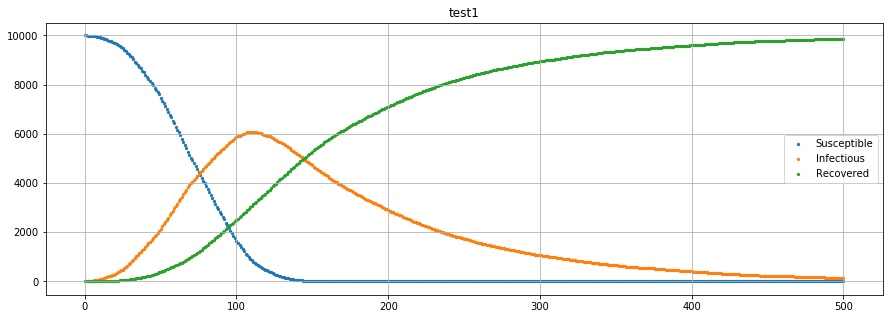

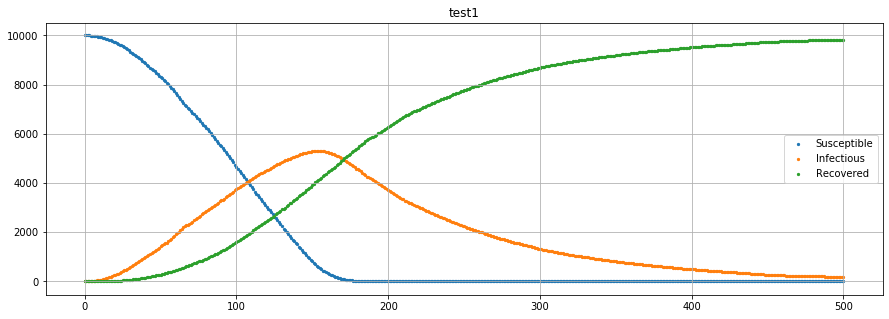

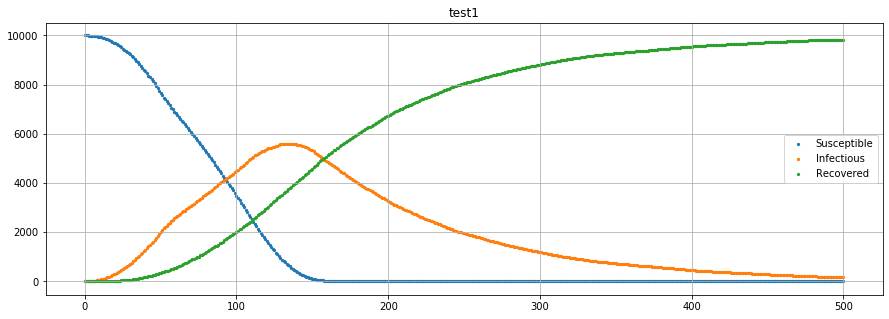

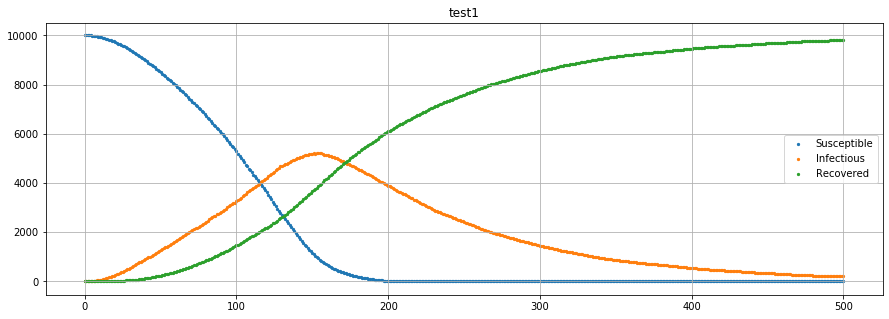

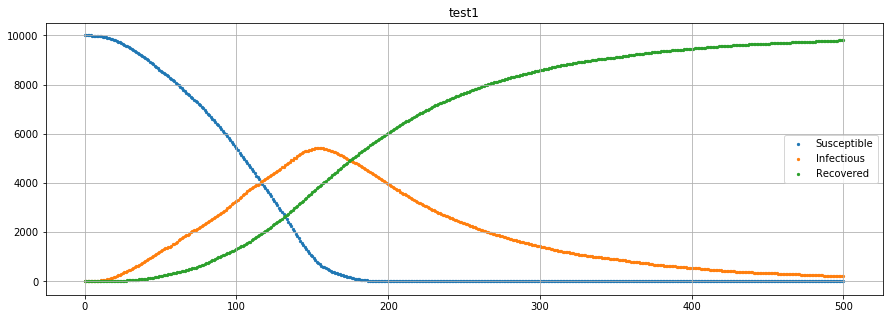

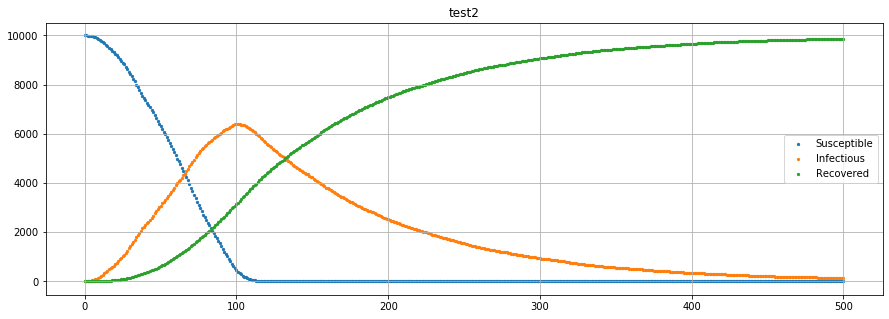

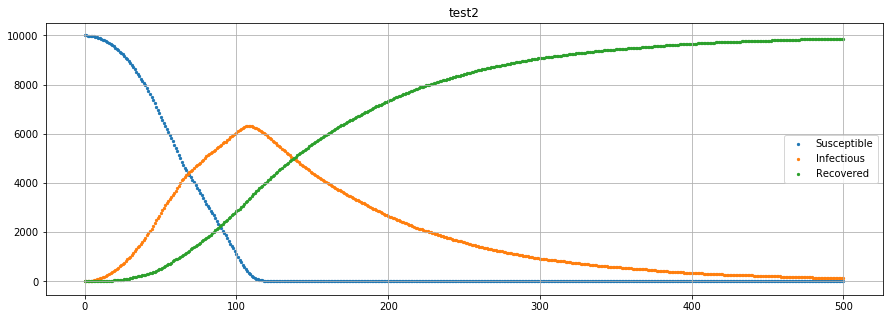

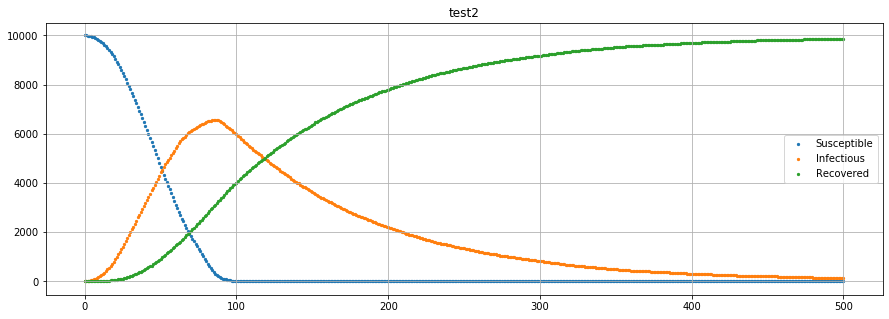

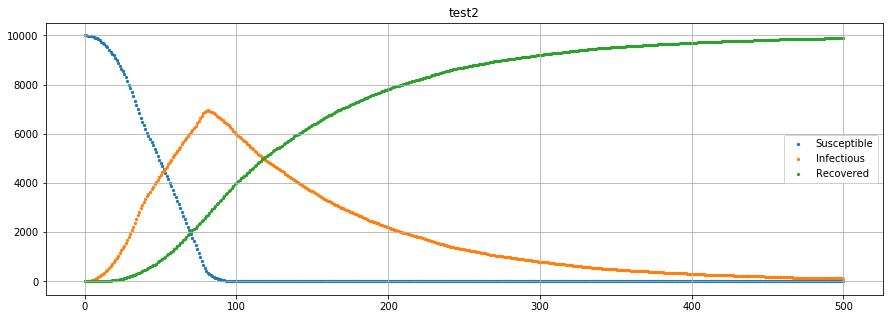

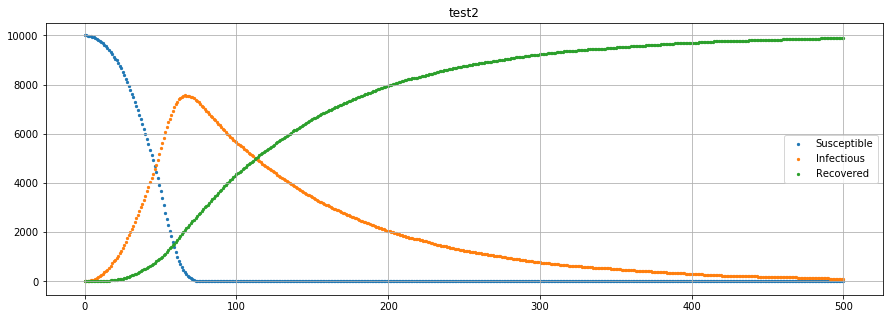

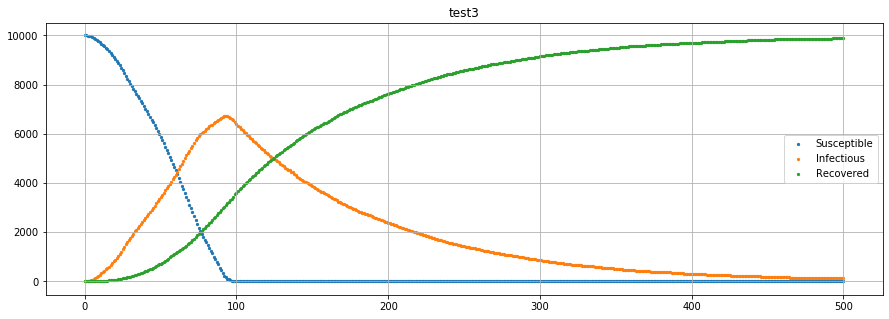

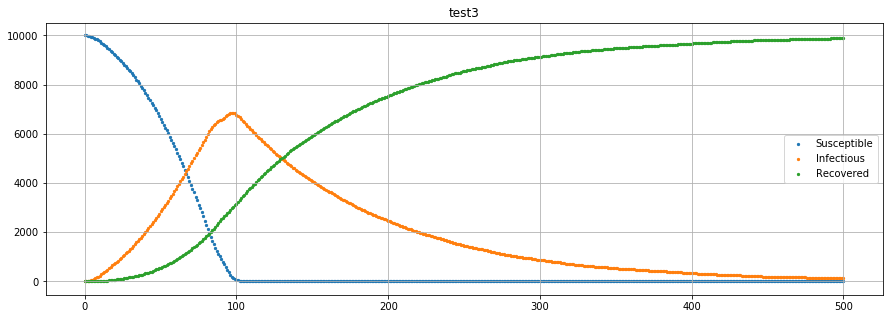

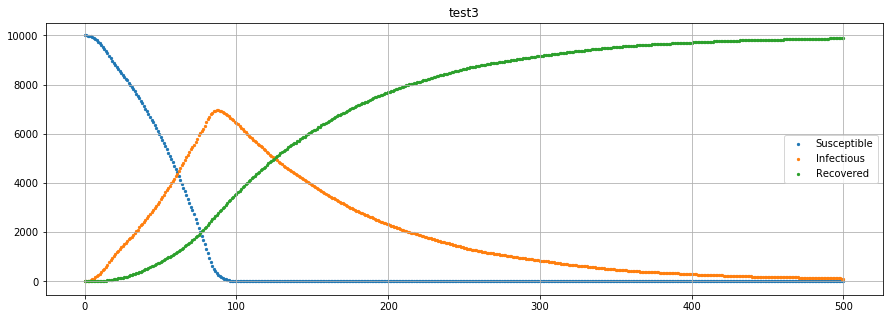

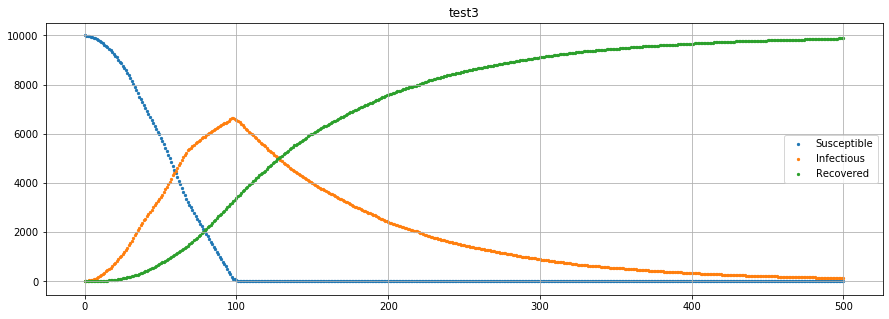

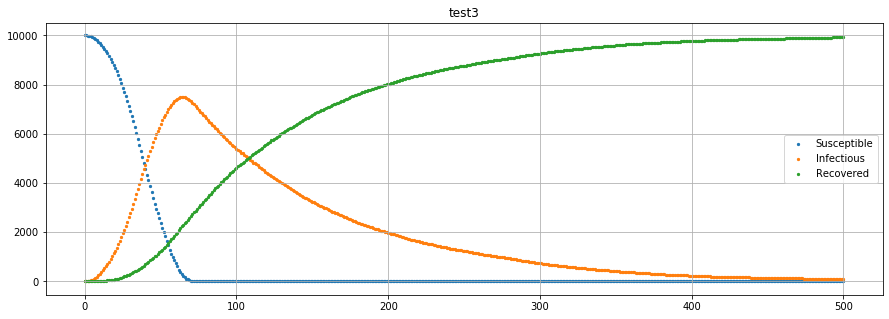

In [2]:
testcom1 = Community('test1', 100)
testcom1.setBaseInfectionProbability(0.2)
testcom1.calculateInfectionProbability(0) # r=0
testcom1.setRecoveryProbability(0.01)

testcom2 = Community('test2', 100)
testcom2.setBaseInfectionProbability(0.4)
testcom2.calculateInfectionProbability(0) # r=0
testcom2.setRecoveryProbability(0.01)

testcom3 = Community('test3', 100)
testcom3.setBaseInfectionProbability(0.6)
testcom3.calculateInfectionProbability(0) # r=0
testcom3.setRecoveryProbability(0.01)

community_dict = {testcom1.getName(): testcom1,
                  testcom2.getName(): testcom2,
                  testcom3.getName(): testcom3}

testsim = Simulator(community_dict)

testsim.simulate(numberOfSimulations = 5, simulationSteps=500, initiallyInfected=1, plot=True)


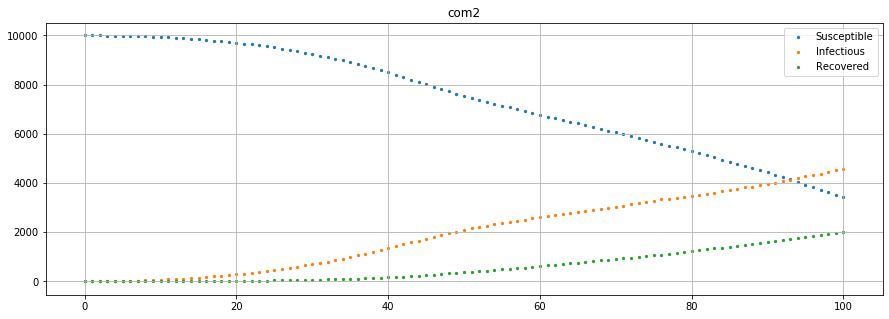

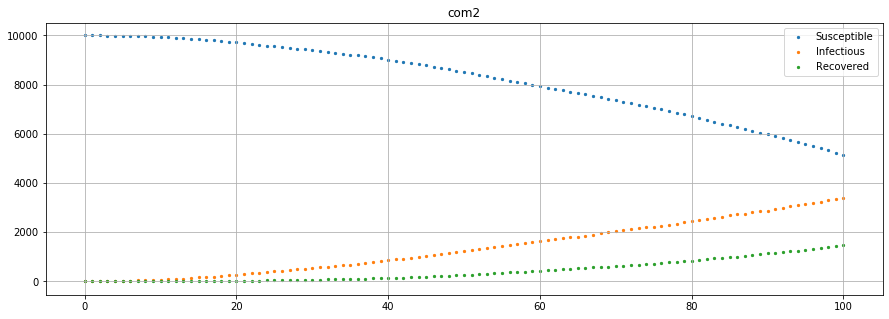

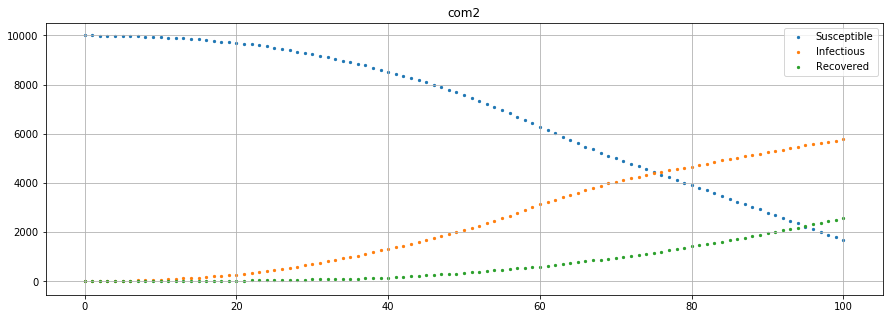

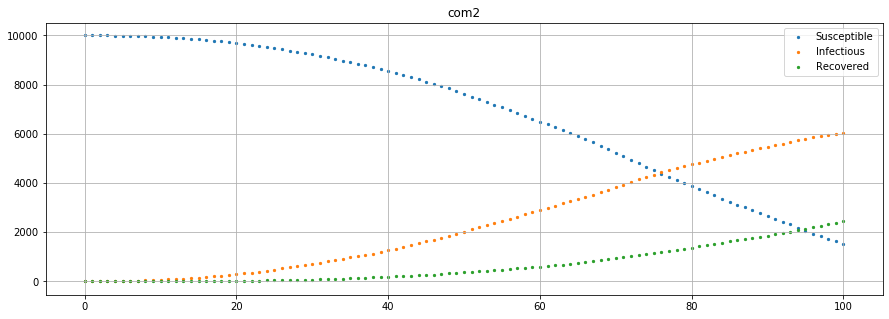

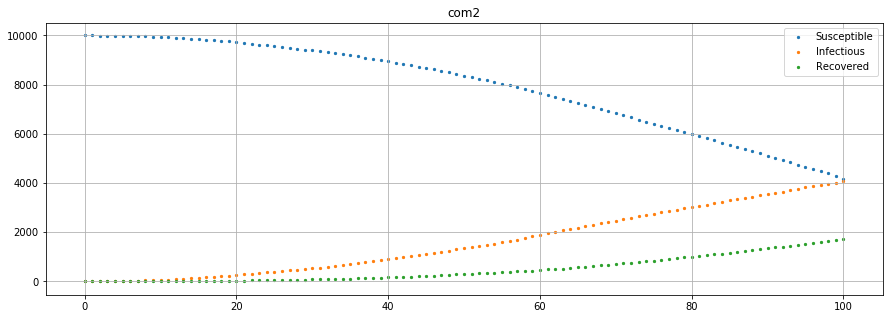

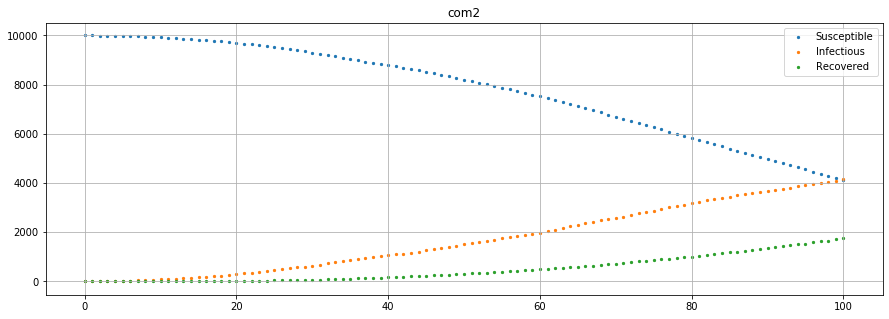

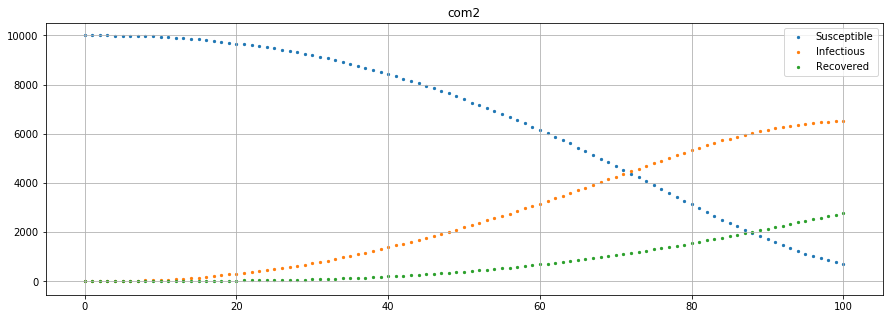

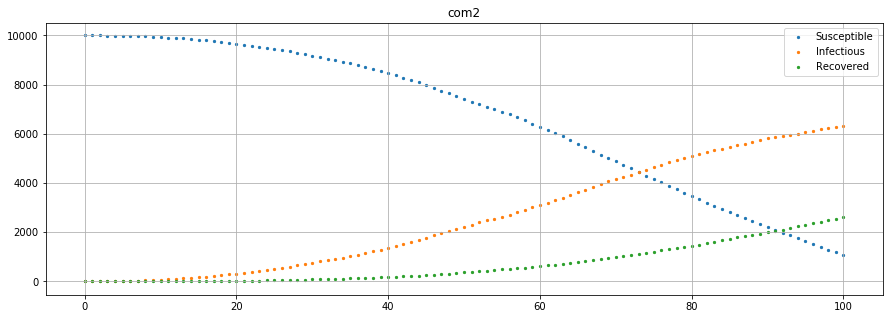

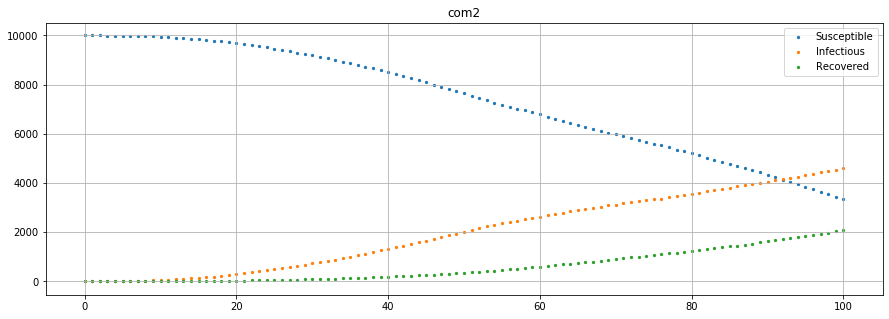

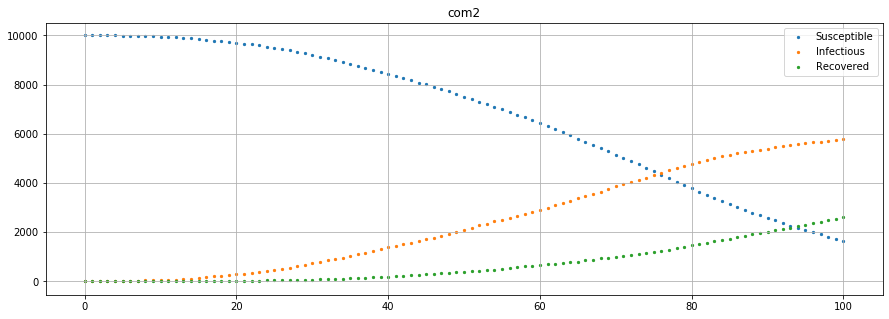

In [3]:
# create the community you'll use in the multiple simulations
com2 = Community('com2', 100)

# set up your community
com2.addInitiallyInfected(1)
com2.setBaseInfectionProbability(0.2)
com2.calculateInfectionProbability(0) # r=0
com2.setRecoveryProbability(0.01)

# put the community inside a dictionary, where the key is its name and the value is the Community object
s1InputDict = {com2.getName(): com2}

# instantiate the simulator
s1 = Simulator(s1InputDict)

# make the multiple simulations by giving a number of time steps per simulation, as well as the number of simulations (450 and 100 here)
s1.simulate(numberOfSimulations = 10, simulationSteps = 100, plot=True)

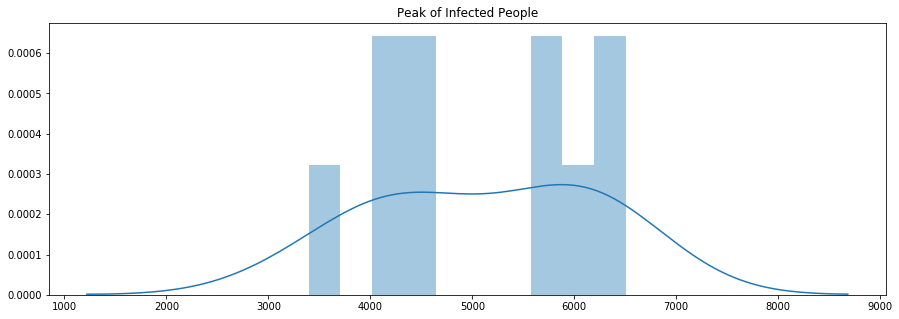

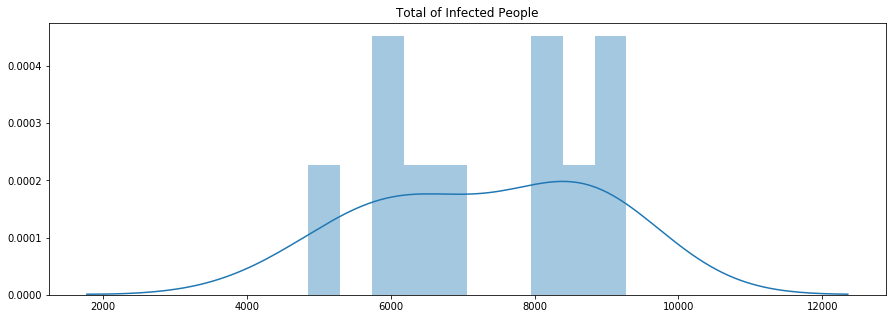

dict_keys(['max_infected_array', 'total_infected_array'])

In [4]:
# get the dictionary with the results for this community
com2SimulationsResultsDict = s1.resultsDict[com2.getName()]

bins = 10
# show histograms of the simulations' peaks and outbreaks' durations, as well as the total of sick people throughout the duration of the outbreak
sns.distplot(com2SimulationsResultsDict['max_infected_array'], bins=bins)
plt.title('Peak of Infected People')
plt.show()

#plt.hist(com2SimulationsResultsDict['duration_array'], bins=bins)
#plt.title('Duration of Outbreaks')
#plt.show()

sns.distplot(com2SimulationsResultsDict['total_infected_array'], bins=bins)
plt.title('Total of Infected People')
plt.show()

com2SimulationsResultsDict.keys()

### Simulating migration -- DEPRECATED





In [5]:
# create community with no infected people
com1 = Community('com1', 100)

# set up your community
com1.addInitiallyInfected(0)
com1.setBaseInfectionProbability(0.2)
com1.calculateInfectionProbability(0) # r=0
com1.setRecoveryProbability(0.05)

# create the community which will infect the other via migration
com2 = Community('com2', 1000)

# set up your community
com2.addInitiallyInfected(10000)
com2.setBaseInfectionProbability(0.1)
com2.calculateInfectionProbability(0) # r=0
com2.setRecoveryProbability(0.1)

# put the community inside a dictionary, where the key is its name and the value is the Community object
s1InputDict = {
    com1.getName(): com1,
    com2.getName(): com2
    }

# instantiate the simulator
s1 = Simulator(s1InputDict)

s1.migrationSimulationofTwoCommunities(com1, com2, numSwapped = 10, simulationSteps = 200, plot=True)

AttributeError: 'Simulator' object has no attribute 'migrationSimulationofTwoCommunities'

In [8]:
com_dict = dict()

num_simulations = 100
for i in range(num_simulations):
  com1 = Community('com1', 100)

  # set up your community
  com1.addInitiallyInfected(0)
  com1.setBaseInfectionProbability(0.2)
  com1.calculateInfectionProbability(0) # r=0
  com1.setRecoveryProbability(0.05)

  # create the community which will infect the other via migration
  com2 = Community('com2', 100)

  # set up your community
  com2.addInitiallyInfected(100)
  com2.setBaseInfectionProbability(0.15)
  com2.calculateInfectionProbability(0) # r=0
  com2.setRecoveryProbability(0.1)

  # put the community inside a dictionary, where the key is its name and the value is the Community object
  s1InputDict = {
      com1.getName(): com1,
      com2.getName(): com2
      }

  # instantiate the simulator
  s1 = Simulator(s1InputDict)

  s1.migrationSimulationofTwoCommunities(com1, com2, numSwapped = 10, simulationSteps = 200, plot=False)
  com_dict[i] = [com1, com2]

TypeError: simulate() got an unexpected keyword argument 'numSwapped'

In [7]:
com_dict[0][0].SIR[0].max(), com_dict[0][0].SIR[1].max(), com_dict[0][0].SIR[2].max()

max_infected = np.zeros((2,num_simulations))
for key in com_dict:
  max_infected[0,key] = com_dict[key][0].SIR[1].max()
  max_infected[1,key] = com_dict[key][1].SIR[1].max()

NameError: name 'com_dict' is not defined

In [6]:
sns.distplot(max_infected[0], bins=10)
sns.distplot(max_infected[1], bins=10)

NameError: name 'max_infected' is not defined

In [0]:
    self.recovery_probability = 0 # this is the probability of recovering if the person is infected
    self.peak_number_of_infections = 0 # this is the peak number of infected people at the same time during the simulation
    self.total_infections = 0 # this is the total number of people that were infected or are currently infected at the time where the outbreak ends
    self.duration_of_outbreak = 0 # this is the number of time steps that the outbreaks lasts, calculated to be the 
                                  # time step after the peak where the number of infected is for the first time less 
                                  # than 10% of the peak number of infected 

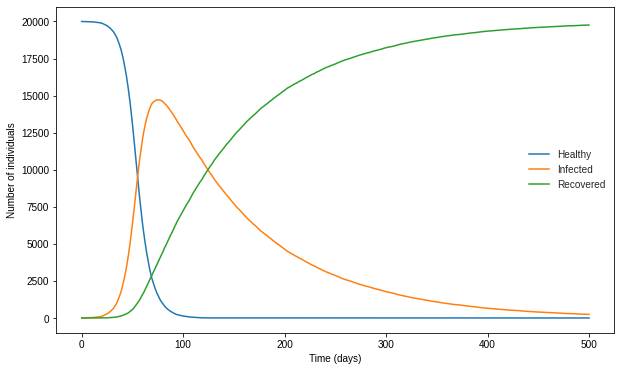

In [0]:
plt.figure(figsize=(10,6))
comb_sir = com1.SIR + com2.SIR
plt.plot(com1.time, comb_sir[0], label='Healthy')#, color='plum')
plt.plot(com1.time, comb_sir[1], label='Infected')#, color='orange')
plt.plot(com1.time, comb_sir[2], label='Recovered')#, color='green')

plt.style.use('seaborn')
plt.ylabel('Number of individuals')
plt.xlabel('Time (days)')
plt.legend()
plt.savefig('SIR_model')

### Simulating multiple SIR scenarios multiple times with the Simulator Class

Here we compare three communitites that are exactly the same, varying their social distance (0%, 25% and 50% respectevely). Each community is simulated a 100 times.

In [0]:
# create the communities you'll use in the multiple simulations
com3 = Community('com3', 100)
com4 = Community('com4', 100)
com5 = Community('com5', 100)

# set up your communities, the only difference between these is that they've social distancing of .0, .25, and .5 respectively
com3.addInitiallyInfected(1)
com4.addInitiallyInfected(1)
com5.addInitiallyInfected(1)


com3.setBaseInfectionProbability(0.2)
com4.setBaseInfectionProbability(0.2)
com5.setBaseInfectionProbability(0.2)

com3.calculateInfectionProbability(0) # r=0
com4.calculateInfectionProbability(0.25) # r=0.25
com5.calculateInfectionProbability(0.5) # r=0.5

com3.setRecoveryProbability(0.01)
com4.setRecoveryProbability(0.01)
com5.setRecoveryProbability(0.01)

# put the communities inside a dictionary, where the key is its name and the value is the Community object
s2InputDict = {com3.getName(): com3,
               com4.getName(): com4,
               com5.getName(): com5}

# instantiate the simulator
s2 = Simulator(s2InputDict)

# make the multiple simulations by giving a number of time steps per simulation, as well as the number of simulations (600 and 100 here)
s2.multipleSimulationsOfSameSIRScenario(600, 100)

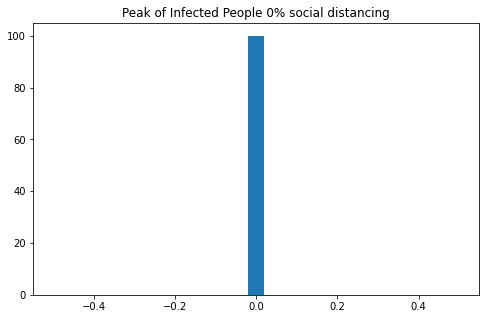

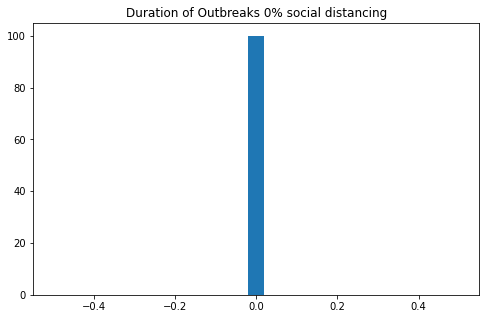

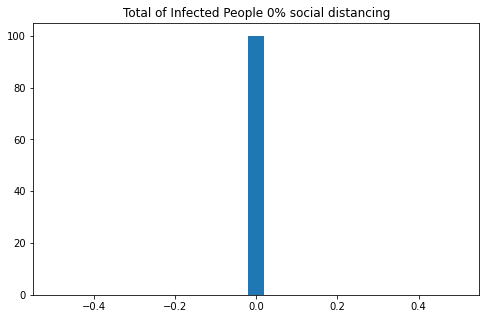

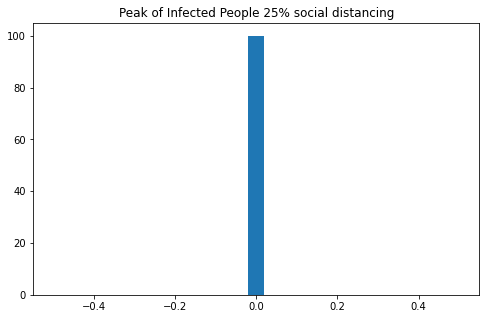

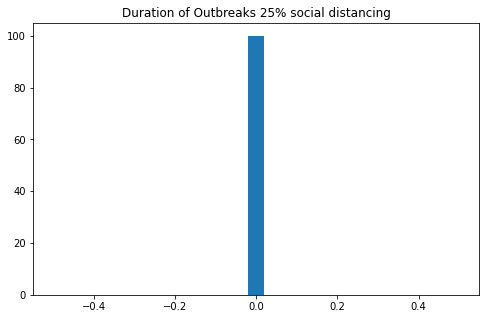

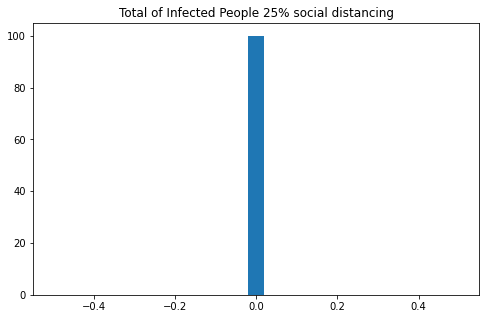

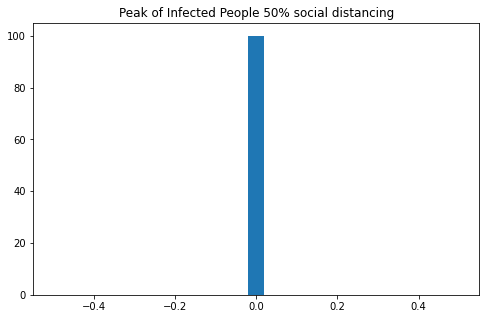

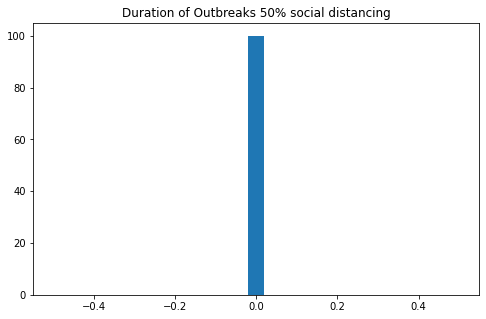

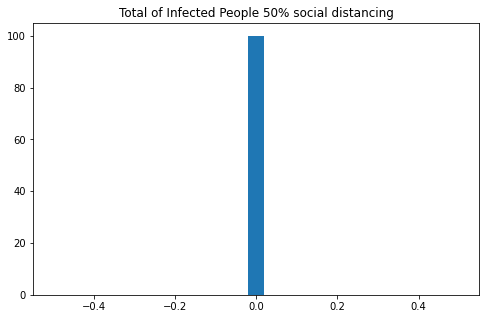

In [0]:
plt.rcParams['figure.figsize'] = (8,5)
# get the dictionary with the results for each community
com3SimulationsResultsDict = s2.resultsDict[com3.getName()]
com4SimulationsResultsDict = s2.resultsDict[com4.getName()]
com5SimulationsResultsDict = s2.resultsDict[com5.getName()]

# show histograms of the simulations' peaks and outbreaks' durations, as well as the total of sick people throughout the duration of the outbreak
plt.hist(com3SimulationsResultsDict['max_infected_array'], bins=20)
plt.title('Peak of Infected People 0% social distancing')
plt.show()

plt.hist(com3SimulationsResultsDict['duration_array'], bins=25)
plt.title('Duration of Outbreaks 0% social distancing')
plt.show()

plt.hist(com3SimulationsResultsDict['total_infected_array'], bins=25)
plt.title('Total of Infected People 0% social distancing')
plt.show()

# show histograms of the simulations' peaks and outbreaks' durations, as well as the total of sick people throughout the duration of the outbreak
plt.hist(com4SimulationsResultsDict['max_infected_array'], bins=25)
plt.title('Peak of Infected People 25% social distancing')
plt.show()

plt.hist(com4SimulationsResultsDict['duration_array'], bins=25)
plt.title('Duration of Outbreaks 25% social distancing')
plt.show()

plt.hist(com4SimulationsResultsDict['total_infected_array'], bins=25)
plt.title('Total of Infected People 25% social distancing')
plt.show()

# show histograms of the simulations' peaks and outbreaks' durations, as well as the total of sick people throughout the duration of the outbreak
plt.hist(com5SimulationsResultsDict['max_infected_array'], bins=25)
plt.title('Peak of Infected People 50% social distancing')
plt.show()

plt.hist(com5SimulationsResultsDict['duration_array'], bins=25)
plt.title('Duration of Outbreaks 50% social distancing')
plt.show()

plt.hist(com5SimulationsResultsDict['total_infected_array'], bins=25)
plt.title('Total of Infected People 50% social distancing')
plt.show()

In [0]:
com1 = Community('com1', 100)

com1.setBaseInfectionProbability(0.2)
com1.calculateInfectionProbability(0)
com1.setRecoveryProbability(0.01)
com1.addInitiallyInfected(1)

for i in range(1000):
  com1.simulateOneTimeStep()

(0.0, 10000.0)

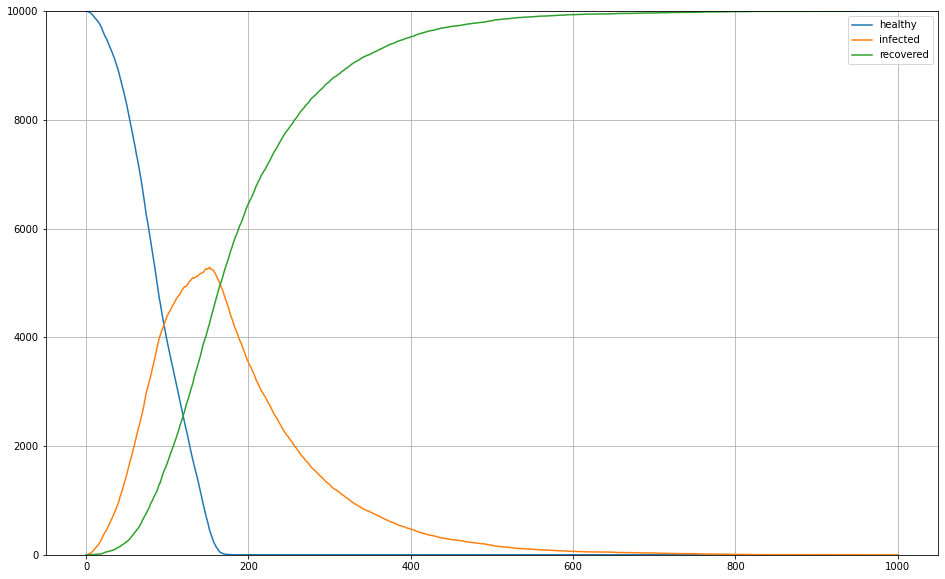

In [0]:
x = np.arange(com1.SIR.shape[1])
plt.plot(x, com1.SIR[0,:], ms=10, label='healthy')
plt.plot(x, com1.SIR[1,:], ms=10, label='infected')
plt.plot(x, com1.SIR[2,:], ms=10,label='recovered')

plt.legend()
plt.grid()
plt.ylim((0,com1.getPopulation()))

In [0]:
def funcCheck(func, *args):
  print(func(*args))
def compareX(x,y):
  return x > y

funcCheck(compareX, 3,3)

False


In [0]:
grid = np.zeros((100,100))
def applyCondition(func, *args):
    grid[func(*args)] = 1

def conditional1(prob_matrix, conditional_prob):
  return prob_matrix > conditional_prob

applyCondition(conditional1, np.random.rand(100,100), 0.05)

In [0]:
com1.SIR.shape
com1.additionalGroups = np.zeros((1,201))
(com1.SIR+com1.additionalGroups).shape

(3, 201)

In [0]:
np.concatenate(com1.SIR,com1.additionalGroups)

In [0]:
com1.additionalGroups[0,0]

0.0

In [0]:
com1.SIR = np.concatenate([com1.SIR, com1.additionalGroups])

In [0]:
generateIndices()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
def generateIndices(command):
  prob_matrix = np.random.rand(100, 100)
  return prob_matrix < command